In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.stats import kurtosis, skew

In [2]:
data= []

time = []

curr_X = []
curr_Y = []

delta_X = []
delta_Y = []

delta_time = []

disp = []

nonX = []
nonY = []
nonS = []


for i in range(2,3):
    participant = i
    zeros = 4 - len(str(participant))
    data.append(pd.read_csv("data\Participant"+ zeros*'0' + str(participant) + ".tsv",sep="\t"))


    time.append(data[-1]['Eyetracker timestamp'])
    curr_X.append(data[-1]['Gaze point X'])
    curr_Y.append(data[-1]['Gaze point Y'])
    delta_X.append(np.diff(curr_X[-1]))
    delta_Y.append(np.diff(curr_Y[-1]))
    delta_time.append(np.diff(time[-1]))
    disp.append(np.sqrt(np.diff(curr_X[-1])**2 + np.diff(curr_Y[-1])**2))
    #speed.append(disp[-1]/delta_time[-1])

    #remove NaN/missing
    #nonX.append(d_X[-1][np.logical_not(np.isnan(d_X[-1]))])
    #nonY.append(d_Y[-1][np.logical_not(np.isnan(d_Y[-1]))])
    #nonS.append(d_S[-1][np.logical_not(np.isnan(d_S[-1]))])


In [3]:
test = pd.read_csv("data\Participant"+ zeros*'0' + str(participant) + ".tsv",sep="\t")

In [5]:
x_val3 = test.iloc[:, 39:40].values
y_val3 = test.iloc[:, 40:41].values
t_stamps3 = test.iloc[:, 0:1].values
f_type3 = test.iloc[:, 79:80].values

x_val2 = np.array(x_val3).sum(axis=1)
y_val2 = np.array(y_val3).sum(axis=1)
t_stamps2 = np.array(t_stamps3).sum(axis=1)
f_type2 = np.array(f_type3).sum(axis=1)

#print(x_val2[6])
#print(y_val2[6])
print(len(x_val2))
print(len(y_val2))
print(len(t_stamps2))

x_val = []
y_val = []
t_stamps = []
f_type = []

for i in range(len(x_val2)):
    if math.isnan(x_val2[i]):
        pass
    elif math.isnan(y_val2[i]):
        pass
    else:
        x_val.append(x_val2[i])
        y_val.append(y_val2[i])
        t_stamps.append(t_stamps2[i]/1000000)
        f_type.append(f_type2[i])
        
print(len(x_val))
print(len(y_val))
print(len(t_stamps))


46556
46556
46556
41174
41174
41174


In [6]:
# Feature Duration

print("Timestamps")
#print(fix_timestamp)

duration_diff = []

#t_stamps = test.iloc[:, 0:1].values
        
#print(len(t_stamps))  

#Print diff in timestamps for easy feature seperation

for i in range(len(x_val)-1):
    
    if math.isnan(t_stamps[i+1] - t_stamps[i]):
        pass
    else:
        duration_diff.append(t_stamps[i+1] - t_stamps[i])

#print(duration_diff)
print(len(duration_diff))




Timestamps
41173


In [7]:
# Feature Displacement

point_disp = []  
x_point_len = []
y_point_len = []
    
for i in range(len(x_val)-1):
    
    x_point_len.append(x_val[i+1] - x_val[i])
    
    y_point_len.append(y_val[i+1] - y_val[i])
        
    point_disp.append(np.sqrt(x_point_len[i]**2 + y_point_len[i]**2))

print(len(point_disp))
#print(point_disp)


41173


41173


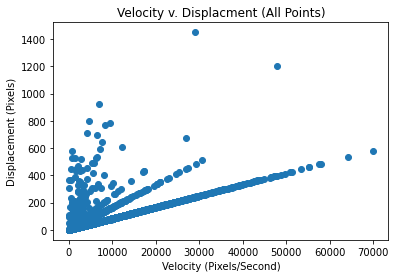

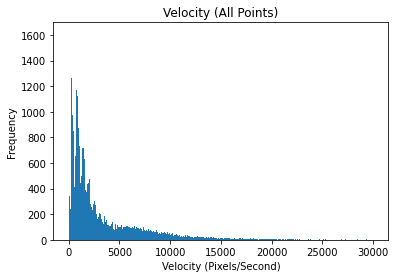

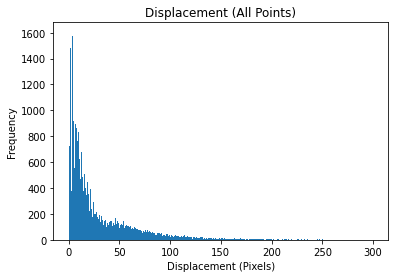

In [8]:
#Velocity

point_velo = []
    
for i in range(len(point_disp)):
        
    point_velo.append(point_disp[i]/(duration_diff[i]))

print(len(point_velo))

#plt.scatter(point_disp,duration_diff)
#plt.xlabel("Displacement")
#plt.ylim(0, 1)
#plt.xlim(0, 3.5)
#plt.ylabel("Duration")
#plt.title("Duration v. Displacment (All Points)")
#plt.savefig("Fixations_feat_velo")
#plt.show()

#plt.scatter(point_velo,duration_diff)
#plt.xlabel("Velocity")
#plt.ylim(0, 1)
#plt.xlim(0, 3.5)
#plt.ylabel("Duration")
#plt.title("Velocity v. Displacment (All Points)")
#plt.savefig("Fixations_feat_velo")
#plt.show()

plt.scatter(point_velo,point_disp)
plt.xlabel("Velocity (Pixels/Second)")
plt.ylabel("Displacement (Pixels)")
#plt.ylim(0, 400000)
#plt.xlim(0, 3.5)
plt.title("Velocity v. Displacment (All Points)")
#plt.savefig("Fixations_feat_velo")
plt.show()

plt.hist(point_velo,500,range=[0,30000])
plt.title("Velocity (All Points)")
plt.xlabel("Velocity (Pixels/Second)")
plt.ylabel("Frequency")
plt.show()

plt.hist(point_disp,500,range=[0,300])
plt.title("Displacement (All Points)")
plt.xlabel("Displacement (Pixels)")
plt.ylabel("Frequency")
plt.show()

<ipython-input-10-32d9da7ca3a7>:20: RuntimeWarning: invalid value encountered in true_divide
  unit2 = vec2 / np.linalg.norm(vec2)
<ipython-input-10-32d9da7ca3a7>:19: RuntimeWarning: invalid value encountered in true_divide
  unit1 = vec1 / np.linalg.norm(vec1)
<ipython-input-10-32d9da7ca3a7>:24: RuntimeWarning: invalid value encountered in arccos
  if (math.isnan(np.arccos(dot_product))):


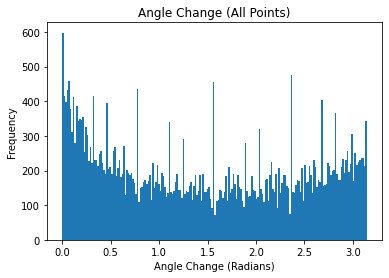

In [10]:
#Angle

theta_np = []

ang_time = []

duration_diff_corr = []

point_velo_corr = []

point_disp_corr = []

f_type_corr = []

for i in range(len(duration_diff)-1):
    vec1 = [x_point_len[i],y_point_len[i]]
    vec2 = [x_point_len[i+1],y_point_len[i+1]]
 
    unit1 = vec1 / np.linalg.norm(vec1)
    unit2 = vec2 / np.linalg.norm(vec2)
    dot_product = np.dot(unit1, unit2)
    #print(np.arccos(dot_product))
    
    if (math.isnan(np.arccos(dot_product))):
        pass
    else:
        theta_np.append(math.pi - np.arccos(dot_product))
        ang_time.append(t_stamps[i+1])
        duration_diff_corr.append(duration_diff[i])
        point_velo_corr.append(point_velo[i])
        point_disp_corr.append(point_disp[i])
        f_type_corr.append(f_type[i])
        
#print(len(theta_np))

#print(len(duration_diff))
#print(len(duration_diff_corr))

plt.hist(theta_np,200)
plt.title("Angle Change (All Points)")
plt.xlabel("Angle Change (Radians)")
plt.ylabel("Frequency")
plt.show()

24929
9375
5859


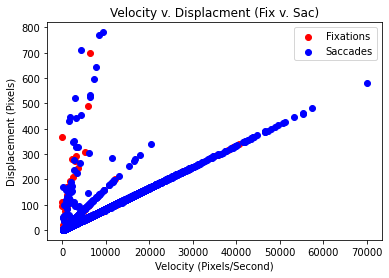

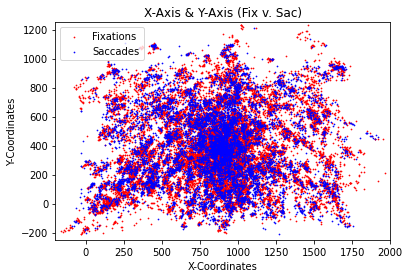

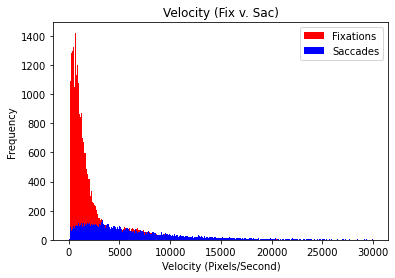

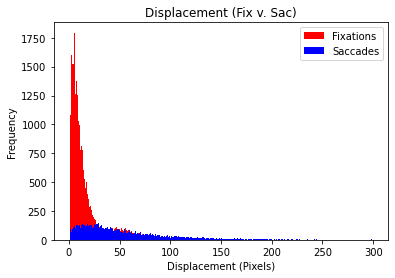

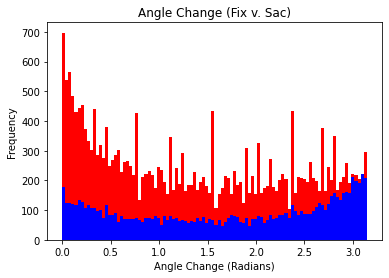

In [15]:
#Eye-Tracker Algorithm

f_type_corr

x_fix = []
y_fix = []

x_sac = []
y_sac = []

fix_timestamp = []
sac_timestamp = []

fix_duration = []
sac_duration = []

fix_displacement = []
sac_displacement = []

fix_velo = []
sac_velo = []

fix_theta = []
sac_theta = []

classifier = []

outliers = []

for i in range (len(f_type_corr)):
    if f_type_corr[i] == "Fixation":
        x_fix.append(x_val[i+1])
        y_fix.append(y_val[i+1])
        fix_timestamp.append(ang_time[i])
        fix_duration.append(duration_diff_corr[i])
        fix_displacement.append(point_disp_corr[i])
        fix_velo.append(point_velo_corr[i])
        fix_theta.append(theta_np[i])
        classifier.append("fixation")
        
    elif f_type_corr[i] == "Saccade":
        x_sac.append(x_val[i+1])
        y_sac.append(y_val[i+1])
        sac_timestamp.append(ang_time[i])
        sac_duration.append(duration_diff_corr[i])
        sac_displacement.append(point_disp_corr[i])
        sac_velo.append(point_velo_corr[i])
        sac_theta.append(theta_np[i])
        classifier.append("saccade")
        
    else:
        outliers.append(point_velo_corr[i])

print(len(x_fix))

print(len(x_sac))

#print(len(x_sac + y_sac))

#print(outliers)
print(len(outliers))

plt.scatter(fix_velo,fix_displacement, c="red",label="Fixations")
plt.scatter(sac_velo,sac_displacement, c="blue",label="Saccades")
plt.legend()
plt.xlabel("Velocity (Pixels/Second)")
plt.ylabel("Displacement (Pixels)")
#plt.ylim(0, 400000)
#plt.xlim(0, 3.5)
plt.title("Velocity v. Displacment (Fix v. Sac)")
#plt.savefig("Fixations_feat_velo")
plt.show()

plt.scatter(x_fix,y_fix, s=0.5, c="red",label="Fixations")
plt.scatter(x_sac,y_sac, s=0.5, c="blue",label="Saccades")
plt.legend()
plt.ylabel("Y-Coordinates")
plt.ylim(-250, 1250)
plt.xlim(-200, 2000)
plt.xlabel("X-Coordinates")
plt.title("X-Axis & Y-Axis (Fix v. Sac)")
#plt.savefig("Fixations_feat_velo")
plt.show()

plt.hist(fix_velo,300,range=[0,30000], color ="red",label="Fixations")
plt.hist(sac_velo,300,range=[0,30000], color ="blue",label="Saccades")
plt.legend()
plt.title("Velocity (Fix v. Sac)")
plt.xlabel("Velocity (Pixels/Second)")
plt.ylabel("Frequency")
plt.show()

plt.hist(fix_displacement,300,range=[0,300], color ="red",label="Fixations")
plt.hist(sac_displacement,300,range=[0,300], color ="blue",label="Saccades")
plt.legend()
plt.title("Displacement (Fix v. Sac)")
plt.xlabel("Displacement (Pixels)")
plt.ylabel("Frequency")
plt.show()

plt.hist(fix_theta,100, color ="red",label="Fixations")
plt.hist(sac_theta,100, color ="blue",label="Saccades")
plt.title("Angle Change (Fix v. Sac)")
plt.xlabel("Angle Change (Radians)")
plt.ylabel("Frequency")
plt.show()

30626
9533
[-0.8830042272610119, -22.32638117067437, -7.368543218858096, -37.84468295042282]
4


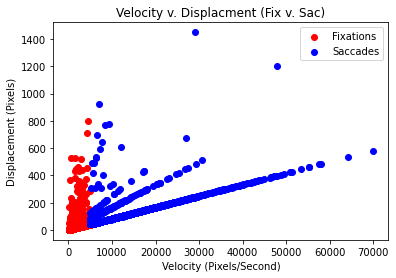

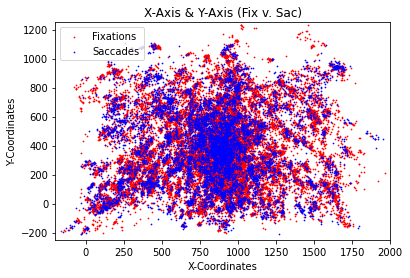

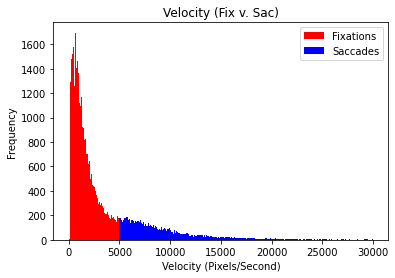

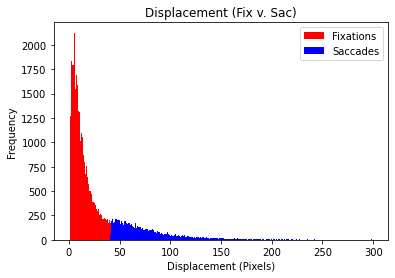

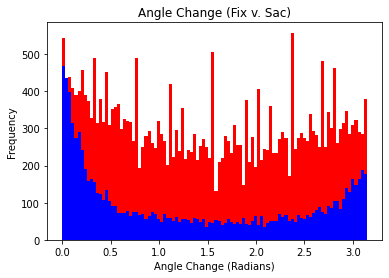

In [9]:
#I-VT (With Angle Calc)

x_fix = []
y_fix = []

x_sac = []
y_sac = []

fix_timestamp = []
sac_timestamp = []

fix_duration = []
sac_duration = []

fix_displacement = []
sac_displacement = []

fix_velo = []
sac_velo = []

fix_theta = []
sac_theta = []

classifier = []

outliers = []

velocity_threshold = 5000

for i in range (len(point_velo_corr)):
    if point_velo_corr[i] >= 0 and point_velo_corr[i] < velocity_threshold:
        x_fix.append(x_val[i+1])
        y_fix.append(y_val[i+1])
        fix_timestamp.append(ang_time[i])
        fix_duration.append(duration_diff_corr[i])
        fix_displacement.append(point_disp_corr[i])
        fix_velo.append(point_velo_corr[i])
        fix_theta.append(theta_np[i])
        classifier.append("fixation")
        
    elif point_velo_corr[i] >= velocity_threshold:
        x_sac.append(x_val[i+1])
        y_sac.append(y_val[i+1])
        sac_timestamp.append(ang_time[i])
        sac_duration.append(duration_diff_corr[i])
        sac_displacement.append(point_disp_corr[i])
        sac_velo.append(point_velo_corr[i])
        sac_theta.append(theta_np[i])
        classifier.append("saccade")
        
    else:
        outliers.append(point_velo_corr[i])

print(len(x_fix))

print(len(x_sac))

#print(len(x_sac + y_sac))

print(outliers)
print(len(outliers))

#print(classifier)

plt.scatter(fix_velo,fix_displacement, c="red",label="Fixations")
plt.scatter(sac_velo,sac_displacement, c="blue",label="Saccades")
plt.legend()
plt.xlabel("Velocity (Pixels/Second)")
plt.ylabel("Displacement (Pixels)")
#plt.ylim(0, 400000)
#plt.xlim(0, 3.5)
plt.title("Velocity v. Displacment (Fix v. Sac)")
#plt.savefig("Fixations_feat_velo")
plt.show()

plt.scatter(x_fix,y_fix, s=0.5, c="red",label="Fixations")
plt.scatter(x_sac,y_sac, s=0.5, c="blue",label="Saccades")
plt.legend()
plt.ylabel("Y-Coordinates")
plt.ylim(-250, 1250)
plt.xlim(-200, 2000)
plt.xlabel("X-Coordinates")
plt.title("X-Axis & Y-Axis (Fix v. Sac)")
#plt.savefig("Fixations_feat_velo")
plt.show()

plt.hist(fix_velo,300,range=[0,30000], color ="red",label="Fixations")
plt.hist(sac_velo,300,range=[0,30000], color ="blue",label="Saccades")
plt.legend()
plt.title("Velocity (Fix v. Sac)")
plt.xlabel("Velocity (Pixels/Second)")
plt.ylabel("Frequency")
plt.show()

plt.hist(fix_displacement,300,range=[0,300], color ="red",label="Fixations")
plt.hist(sac_displacement,300,range=[0,300], color ="blue",label="Saccades")
plt.legend()
plt.title("Displacement (Fix v. Sac)")
plt.xlabel("Displacement (Pixels)")
plt.ylabel("Frequency")
plt.show()

plt.hist(fix_theta,100, color ="red",label="Fixations")
plt.hist(sac_theta,100, color ="blue",label="Saccades")
plt.title("Angle Change (Fix v. Sac)")
plt.xlabel("Angle Change (Radians)")
plt.ylabel("Frequency")
plt.show()

31549
9620
[-0.8830042272610119, -22.32638117067437, -7.368543218858096, -37.84468295042282]
4


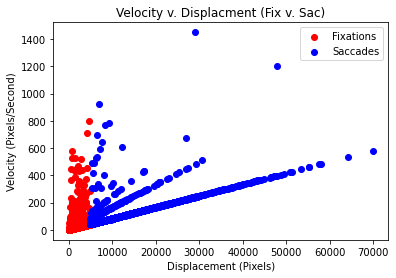

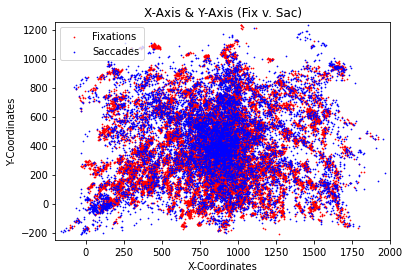

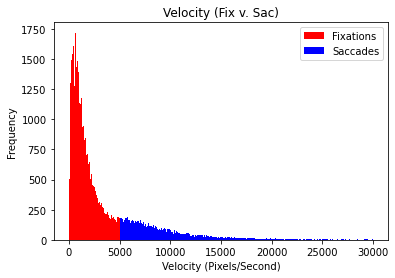

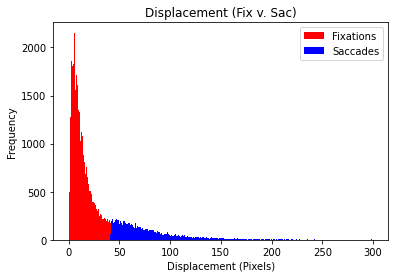

In [31]:
#I-VT (Without Angle Calc)

x_fix = []
y_fix = []

x_sac = []
y_sac = []

fix_timestamp = []
sac_timestamp = []

fix_duration = []
sac_duration = []

fix_displacement = []
sac_displacement = []

fix_velo = []
sac_velo = []

classifier = []

outliers = []

velocity_threshold = 5000

for i in range (len(point_velo)):
    if point_velo[i] >= 0 and point_velo[i] < velocity_threshold:
        x_fix.append(x_val[i+1])
        y_fix.append(y_val[i+1])
        fix_timestamp.append(t_stamps[i+1])
        fix_duration.append(duration_diff[i])
        fix_displacement.append(point_disp[i])
        fix_velo.append(point_velo[i])
        classifier.append("fixation")
        
    elif point_velo[i] >= velocity_threshold:
        x_sac.append(x_val[i+1])
        y_sac.append(y_val[i+1])
        sac_timestamp.append(t_stamps[i+1])
        sac_duration.append(duration_diff[i])
        sac_displacement.append(point_disp[i])
        sac_velo.append(point_velo[i])
        classifier.append("saccade")
        
    else:
        outliers.append(point_velo[i])

print(len(x_fix))

print(len(x_sac))

#print(len(x_sac + y_sac))

print(outliers)
print(len(outliers))

#print(classifier)

plt.scatter(fix_velo,fix_displacement, c="red",label="Fixations")
plt.scatter(sac_velo,sac_displacement, c="blue",label="Saccades")
plt.legend()
plt.xlabel("Velocity (Pixels/Second)")
plt.ylabel("Displacement (Pixels)")
#plt.ylim(0, 400000)
#plt.xlim(0, 3.5)
plt.title("Velocity v. Displacment (Fix v. Sac)")
#plt.savefig("Fixations_feat_velo")
plt.show()

plt.scatter(x_fix,y_fix, s=0.5, c="red",label="Fixations")
plt.scatter(x_sac,y_sac, s=0.5, c="blue",label="Saccades")
plt.legend()
plt.ylabel("Y-Coordinates")
plt.ylim(-250, 1250)
plt.xlim(-200, 2000)
plt.xlabel("X-Coordinates")
plt.title("X-Axis & Y-Axis (Fix v. Sac)")
#plt.savefig("Fixations_feat_velo")
plt.show()

plt.hist(fix_velo,300,range=[0,30000], color ="red",label="Fixations")
plt.hist(sac_velo,300,range=[0,30000], color ="blue",label="Saccades")
plt.legend()
plt.title("Velocity (Fix v. Sac)")
plt.xlabel("Velocity (Pixels/Second)")
plt.ylabel("Frequency")
plt.show()

plt.hist(fix_displacement,300,range=[0,300], color ="red",label="Fixations")
plt.hist(sac_displacement,300,range=[0,300], color ="blue",label="Saccades")
plt.legend()
plt.title("Displacement (Fix v. Sac)")
plt.xlabel("Displacement (Pixels)")
plt.ylabel("Frequency")
plt.show()

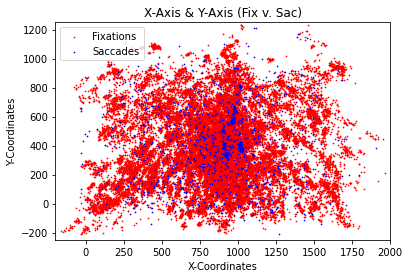

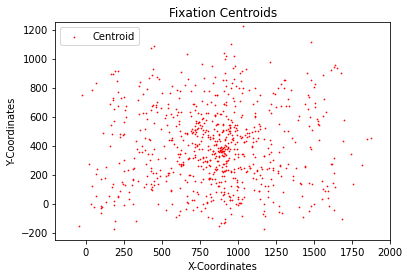

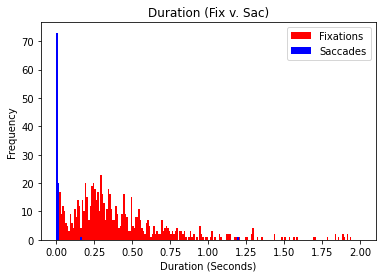

In [33]:
#I-DT

#Less relevant classifications up here

#angle



#Temporary fixation and saccade x/y points
x_temp_fix = []
y_temp_fix = []

#Classified fixation and saccade x/y points
x_fix = []
y_fix = []

x_sac = []
y_sac = []

#Temporary fixation timestamp
fix_temp_timestamp = []

#Classified fixation and saccade timestamps
fix_timestamp = []
sac_timestamp = []

#Fixation and saccade classifier
classifier = []

#Temporary X/Y centroid points
x_temp_centroid = []
y_temp_centroid = []

#Cumulated X/Y centroid values
x_centroid_val = 0
y_centroid_val = 0

#pre_classification_count = 0

#Calculated X/Y centroid points for classified fixations
x_centroid = []
y_centroid = []

#duration for each classified fixation
fixation_duration = []

#comparisson
saccade_duration = []

s_point = 0 #Start point for new dispersion window

for i in range (len(x_val)):
    
    x_thres = 200
    y_thres = 200
    dur_thres = 0.025
    
    startX = x_val[s_point] 
    startY = y_val[s_point] 
    startTime = t_stamps[s_point]
    
    endX = x_val[i] 
    endY = y_val[i] 
    endTime = t_stamps[i]
    
    #absolute X/Y distances from start point
    x_diff = abs(endX - startX)
    y_diff = abs(endY - startY)
    dur_diff = endTime - startTime
        
        
    if(x_diff < x_thres and y_diff < y_thres): #Does it meet proximity?
            
        if(dur_diff > dur_thres): #Does it meet duration? Classify as fixation
            x_temp_fix.append(x_val[i])
            y_temp_fix.append(y_val[i])
            fix_temp_timestamp.append(t_stamps[i])
            x_temp_centroid.append(x_val[i])
            y_temp_centroid.append(y_val[i])
            #classifier.append("fixation")
            fix_dur = dur_diff
                
        else: #Put points "on hold" for either future fixation or saccade classification
            #pre_classification_count = pre_classification_count + 1
            x_temp_fix.append(x_val[i])
            y_temp_fix.append(y_val[i])
            fix_temp_timestamp.append(t_stamps[i])
            x_temp_centroid.append(x_val[i])
            y_temp_centroid.append(y_val[i])
            fix_dur = dur_diff
            pass
            
    else: 
            
        if(dur_diff > dur_thres): #Compute centriod for previous points, reset temp params
                
            for j in range(len(x_temp_fix)): #Put "pending" fixations into fixation classification
                x_fix.append(x_temp_fix[j])
                y_fix.append(y_temp_fix[j])
                fix_timestamp.append(fix_temp_timestamp[j])
                classifier.append("fixation")
                
            for k in range(len(x_temp_centroid)): #Calculating centriod
                x_centroid_val = x_centroid_val + x_temp_centroid[k]
                y_centroid_val = y_centroid_val + y_temp_centroid[k]
            
            #add X/Y centroid values + duration for that fixation into respective arrays
            x_centroid.append(x_centroid_val/len(x_temp_centroid))    
            y_centroid.append(y_centroid_val/len(x_temp_centroid))
            fixation_duration.append(fix_dur)
            
            x_sac.append(x_val[i])
            y_sac.append(y_val[i])
            sac_timestamp.append(t_stamps[i])
            classifier.append("saccade")
            
            x_temp_fix = []
            y_temp_fix = []
            x_temp_centroid = []
            y_temp_centroid = []                
            #pre_classification_count = 0
            x_centroid_val = 0
            y_centroid_val = 0
            s_point = i+1
                
        else: #Classify previous points as saccade
                
            for l in range(len(x_temp_fix)): #Put "pending" fixations into saccade classification
                x_sac.append(x_temp_fix[l])
                y_sac.append(y_temp_fix[l])
                sac_timestamp.append(fix_temp_timestamp[l])
                classifier.append("saccade")
            
            saccade_duration.append(fix_dur)
            x_sac.append(x_val[i])
            y_sac.append(y_val[i])
            sac_timestamp.append(t_stamps[i])
            classifier.append("saccade")
                
            x_temp_fix = []
            y_temp_fix = []
            x_temp_centroid = []
            y_temp_centroid = []
            #pre_classification_count = 0
            x_centroid_val = 0
            y_centroid_val = 0
            s_point = i+1
    

    
#Define start/end durations
#Define X & Y Proximity

#When out of range, classify exisitng points as fixations if dispersion & duration threshold are met
    #if not, the next point (from the original centroid) is the new starting point, previous point classified as a saccade
    
#Compute centroids

plt.scatter(x_fix,y_fix, s=0.5, c="red",label="Fixations")
plt.scatter(x_sac,y_sac, s=0.5, c="blue",label="Saccades")
plt.legend()
plt.ylabel("Y-Coordinates")
plt.ylim(-250, 1250)
plt.xlim(-200, 2000)
plt.xlabel("X-Coordinates")
plt.title("X-Axis & Y-Axis (Fix v. Sac)")
#plt.savefig("Fixations_feat_velo")
plt.show()

plt.scatter(x_centroid,y_centroid, s=0.5, c="red",label="Centroid")
plt.legend()
plt.ylabel("Y-Coordinates")
plt.ylim(-250, 1250)
plt.xlim(-200, 2000)
plt.xlabel("X-Coordinates")
plt.title("Fixation Centroids")
#plt.savefig("Fixations_feat_velo")
plt.show()


plt.hist(fixation_duration,200,range=[0,2], color ="red",label="Fixations")
plt.hist(saccade_duration,200,range=[0,2], color ="blue",label="Saccades")
plt.legend()
plt.title("Duration (Fix v. Sac)")
plt.xlabel("Duration (Seconds)")
plt.ylabel("Frequency")
plt.show()

In [37]:
#I-HMM (https://stackoverflow.com/questions/44812681/hidden-markov-model-gets-stuck-python-hiiden-markov-model-for-eye-movement-det)

from pomegranate import *

def Average(lst):
    return sum(lst) / len(lst)

meanVelocity = Average(point_velo_corr)

fixations_ = []
fixations_time = []

saccades_ = []
saccades_time = []

for i in range(len(point_velo_corr)):
    
    if point_velo_corr[i] < meanVelocity: #fixation
        fixations_.append(point_velo_corr[i])
        fixations_time.append(duration_diff_corr[i])
    else: #saccade
        saccades_.append(point_velo_corr[i])
        saccades_time.append(duration_diff_corr[i])



#Initialize model

#model = Model(name="Saccade-Fixation")
saccade = State(DiscreteDistribution(dict(zip(saccades_time, saccades_))), name="saccades")
fixation = State(DiscreteDistribution(dict(zip(fixations_time, fixations_))), name="fixations")

#Add states to the model.
model = HiddenMarkovModel()
model.add_states(fixation, saccade)

#Add the two transitions from the start of of the model to the hidden states.
model.add_transition(model.start, saccade, 0.5)
model.add_transition(model.start, fixation, 0.5)
model.bake()
sequence = model.sample()

UnboundLocalError: local variable 'dist' referenced before assignment

In [38]:
#I-HMM (Pomogranite Tutorial)

from pomegranate import *

d = NormalDistribution(point_velo_corr)

s1 = State(d, name='fixation')
s2 = State(d, name='saccade')

s3 = State( NormalDistribution(point_velo_corr), name="untied_fixation" )
s4 = State( NormalDistribution(point_velo_corr), name="untied_saccade" )

model = HiddenMarkovModel()
model.add_states( [s1, s2] )
model.add_transition( model.start, s1, 0.5, group='a' )
model.add_transition( model.start, s2, 0.5, group='b' )
model.add_transition( s1, s2, 0.5, group='a' )
model.add_transition( s2, s1, 0.5, group='b' )
model.bake()

sequence = model.sample()

TypeError: __init__() takes at least 2 positional arguments (1 given)

In [18]:
#Fixation and Saccade Grouping (WIP)       

#Classification

fixations = []
saccades = []

feature_classification = [] # append("F") append("S")


#Coordinates

x_fixations = []
x_saccades = []

y_fixations = []
y_saccades = []

feature_x = []
feature_y = []


#Timestamps

fixation_timestamp = []
saccade_timestamp = []

feature_timestamp = []


#Grouping

fix_count = 0
sac_count = 0

for i in range(len(classifier)):
    if classifier[i] == "fixation":
        
        if sac_count > 0:
            sac_count = 0 #Reset and apply
            feature_classification.append(saccades)
            feature_x.append(x_saccades)
            feature_y.append(y_saccades)
            feature_timestamp.append(saccade_timestamp)
            
            saccades = [] #Empty arrays
            x_saccades = []
            y_saccades = []
            saccade_timestamp = []
        
        fix_count = fix_count + 1
        fixations.append("F")
        x_fixations.append(x_val[i+1])
        y_fixations.append(y_val[i+1])
        #fixation_timestamp.append(ang_time[i])
        
    elif classifier[i] == "saccade":
        
        if fix_count > 0:
            fix_count = 0 #Reset and apply
            feature_classification.append(fixations)
            feature_x.append(x_fixations)
            feature_y.append(y_fixations)
            feature_timestamp.append(fixation_timestamp)
            
            fixations = [] #Empty arrays
            x_fixations = []
            y_fixations = []
            fixation_timestamp = []
        
        sac_count = sac_count + 1
        saccades.append("S")
        x_saccades.append(x_val[i+1])
        y_saccades.append(y_val[i+1])
        #saccade_timestamp.append(ang_time[i])
    
    elif i == len(classifier)-1: #When it reaches the end
        
        if sac_count > 0:
            sac_count = 0
            feature_classification.append(saccades)
            feature_x.append(x_saccades)
            feature_y.append(y_saccades)
            feature_timestamp.append(saccade_timestamp)
            
        elif fix_count > 0:
            fix_count = 0
            feature_classification.append(fixations)
            feature_x.append(x_fixations)
            feature_y.append(y_fixations)
            feature_timestamp.append(fixation_timestamp)
            
        else:
            pass
    
    else:
        pass

In [19]:
print(len(feature_classification))

1515


In [20]:
print(feature_classification)

[['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F'], ['S'], ['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F'], ['S'], ['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F'], ['S'], ['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', '